In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#plt.style.use('dark_background')
td=pd.read_csv('/train (4).csv')
te=pd.read_csv('/test (3).csv')
tf= pd.concat([td, te], ignore_index=True)
td.tail()
custom_palette = sns.color_palette(['#2563eb', "#38bdf8"])


In [ ]:
td


,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,Yes
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,No
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,No
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5278,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5279,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5280,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [ ]:
td.columns.values

array(['Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection',
       'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charges',
       'Total_Charges', 'Churn'], dtype=object)

In [ ]:
td.dtypes

Customer_ID           object
Gender                object
Senior_Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [ ]:
td.describe()

,Senior_Citizen,Tenure,Monthly_Charges
count,5282.000000,5282.000000,5282.000000
mean,0.159788,32.414237,64.762609
std,0.366444,24.489554,30.125932
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.450000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.600000


# DATA PREPROCESSING 

In [ ]:
pd.to_numeric(tf.Total_Charges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: Total_Charges, Length: 7043, dtype: bool

In [ ]:
tf['Total_Charges'] = pd.to_numeric(tf['Total_Charges'], errors='coerce')
mean_total_charges = tf['Total_Charges'].mean()

In [ ]:
# Replace empty strings with the mean value
tf['Total_Charges'].replace(' ', mean_total_charges,inplace=True)
tf['Total_Charges'].fillna(mean_total_charges,inplace=True)
tf1=tf

In [ ]:
#Now we can convert the column to numeric

tf1.Total_Charges=pd.to_numeric(tf1['Total_Charges'])

In [ ]:
#Customer ID is not needed as it is different for each entry and cannot have an influence on people churing

tf1.drop('Customer_ID',axis='columns',inplace=True)

In [ ]:
for column in tf1:
    print(f'{column}: {tf1[column].unique()}')


Gender: ['Male' 'Female']
Senior_Citizen: [0 1]
Partner: ['No' 'Yes']
Dependents: ['Yes' 'No']
Tenure: [ 1  7  4 29  3 52 72 55  6 42 30 62 15 68 39 53 66 59  9 32 17 69 16 70
 50 20 71 34 43 41 54 64 31 11 21 35 58 60  2 40 33 63  5 10 38 13 24 23
 51 22 61 19 44 26 28 45 47 48 67 18 25 46 56 27 12 49 37 14 57  8 36 65
  0]
Phone_Service: ['No' 'Yes']
Multiple_Lines: ['No phone service' 'No' 'Yes']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Online_Security: ['No' 'No internet service' 'Yes']
Online_Backup: ['No' 'No internet service' 'Yes']
Device_Protection: ['No' 'Yes' 'No internet service']
Tech_Support: ['No' 'No internet service' 'Yes']
Streaming_TV: ['No' 'No internet service' 'Yes']
Streaming_Movies: ['No' 'No internet service' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
Paperless_Billing: ['Yes' 'No']
Payment_Method: ['Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Mailed check']
Monthly_Charges: [25.3  75.15 20.05 ... 30.6  42.35 35.

In [ ]:
#Also the 'No internet service' means 'No' only in all the columns
#So we can convert 'No internet service' to 'No' is all the fields

tf1.replace('No internet service','No',inplace=True)

#And 'No phone service' for 'Multiple_Lines'

tf1.replace('No phone service','No',inplace=True)

In [ ]:


# Columns to convert
yn_col = ['Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Online_Security', 'Online_Backup',
          'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Paperless_Billing']

# Convert columns to 0/1
tf1[yn_col] = tf1[yn_col].replace({'Yes': 1, 'No': 0})

# Change data type to numeric for all columns
tf1 = tf1.apply(pd.to_numeric, errors='ignore')

# Print the resulting DataFrame and data types

print(tf1.dtypes)
tf1

Gender                object
Senior_Citizen         int64
Partner                int64
Dependents             int64
Tenure                 int64
Phone_Service          int64
Multiple_Lines         int64
Internet_Service      object
Online_Security        int64
Online_Backup          int64
Device_Protection      int64
Tech_Support           int64
Streaming_TV           int64
Streaming_Movies       int64
Contract              object
Paperless_Billing      int64
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn                 object
dtype: object


,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Male,0,0,1,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,25.30,25.30,Yes
1,Female,0,0,0,7,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,75.15,525.00,No
2,Female,0,0,1,4,1,0,No,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),20.05,85.50,No
3,Female,0,0,0,29,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),76.00,2215.25,No
4,Female,0,0,0,3,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),75.10,270.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,0,0,3,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,75.80,246.30,NaN
7039,Female,0,1,0,8,1,1,Fiber optic,0,0,0,1,0,1,Month-to-month,1,Electronic check,90.25,743.75,NaN
7040,Male,0,0,0,29,1,1,DSL,0,1,1,0,0,1,One year,0,Credit card (automatic),70.90,1964.60,NaN
7041,Female,0,0,0,2,0,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,34.70,62.25,NaN


In [ ]:


tf1['Churn'].replace({'Yes': 1,'No': 0},inplace=True)
tf1.Churn=pd.to_numeric(tf1['Churn'])


In [ ]:
tf2 = pd.get_dummies(data=tf1)
tf2.columns



Index(['Senior_Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone_Service',
       'Multiple_Lines', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Paperless_Billing', 'Monthly_Charges', 'Total_Charges', 'Churn',
       'Gender_Female', 'Gender_Male', 'Internet_Service_DSL',
       'Internet_Service_Fiber optic', 'Internet_Service_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Payment_Method_Bank transfer (automatic)',
       'Payment_Method_Credit card (automatic)',
       'Payment_Method_Electronic check', 'Payment_Method_Mailed check'],
      dtype='object')

In [ ]:
td1 = tf1.dropna(subset=['Churn'])
td2 = tf2.dropna(subset=['Churn'])
tf1['Churn'].replace({'Yes': 1,'No': 0},inplace=True)


td1.dtypes

Gender                object
Senior_Citizen         int64
Partner                int64
Dependents             int64
Tenure                 int64
Phone_Service          int64
Multiple_Lines         int64
Internet_Service      object
Online_Security        int64
Online_Backup          int64
Device_Protection      int64
Tech_Support           int64
Streaming_TV           int64
Streaming_Movies       int64
Contract              object
Paperless_Billing      int64
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn                float64
dtype: object

In [ ]:
td2.dtypes

Senior_Citizen                                int64
Partner                                       int64
Dependents                                    int64
Tenure                                        int64
Phone_Service                                 int64
Multiple_Lines                                int64
Online_Security                               int64
Online_Backup                                 int64
Device_Protection                             int64
Tech_Support                                  int64
Streaming_TV                                  int64
Streaming_Movies                              int64
Paperless_Billing                             int64
Monthly_Charges                             float64
Total_Charges                               float64
Churn                                       float64
Gender_Female                                 uint8
Gender_Male                                   uint8
Internet_Service_DSL                          uint8
Internet_Ser

# Demographic analysis

## Male Vs Female

<ipython-input-478-0afdffb2519a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=td1, palette=custom_palette)


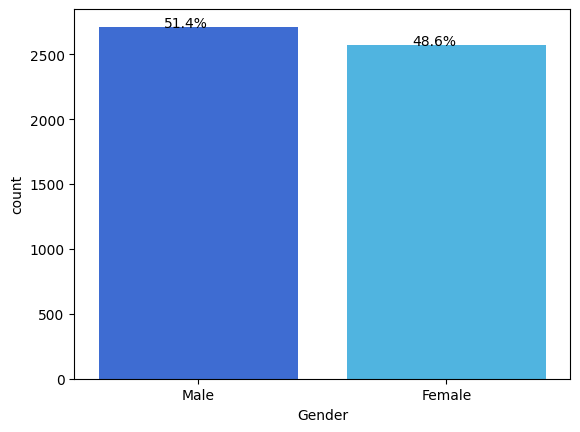

In [ ]:


ax = sns.countplot(x='Gender', data=td1, palette=custom_palette)
total = len(td1)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')


## Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

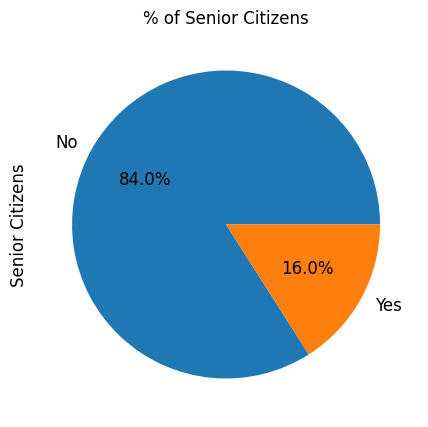

In [ ]:
ax = (td1['Senior_Citizen'].value_counts()*100.0 /len(td1))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )

ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

## Churn Distribution %

<ipython-input-480-bdde1d80e3f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=td1, palette=custom_palette)


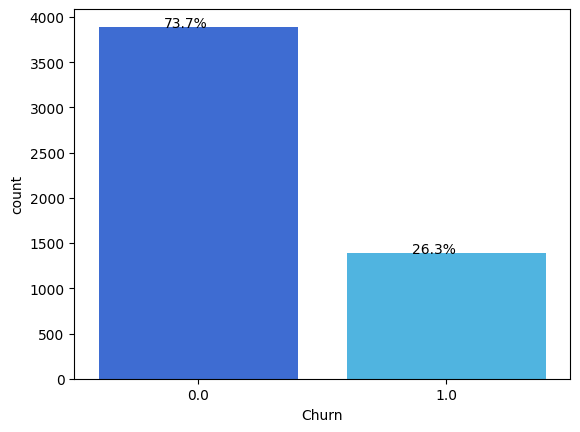

In [ ]:
ax = sns.countplot(x='Churn', data=td1, palette=custom_palette)
total = len(td1)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

## Partners Churn

<Axes: xlabel='Partner', ylabel='count'>

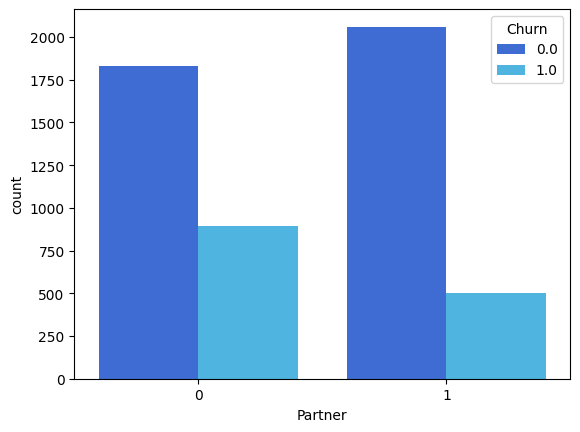

In [ ]:
sns.countplot(x='Partner',data=td1,hue='Churn',palette=custom_palette)

<ipython-input-482-d9b7fa04efe4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Dependents', data=td1, palette=custom_palette)


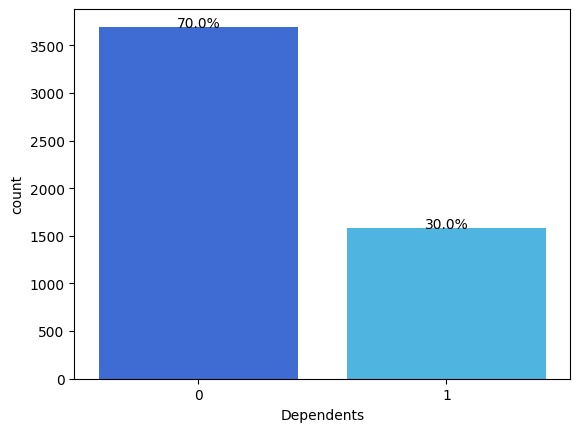

In [ ]:

ax = sns.countplot(x='Dependents', data=td1, palette=custom_palette)
total = len(td1)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

# EDA    

<Axes: >

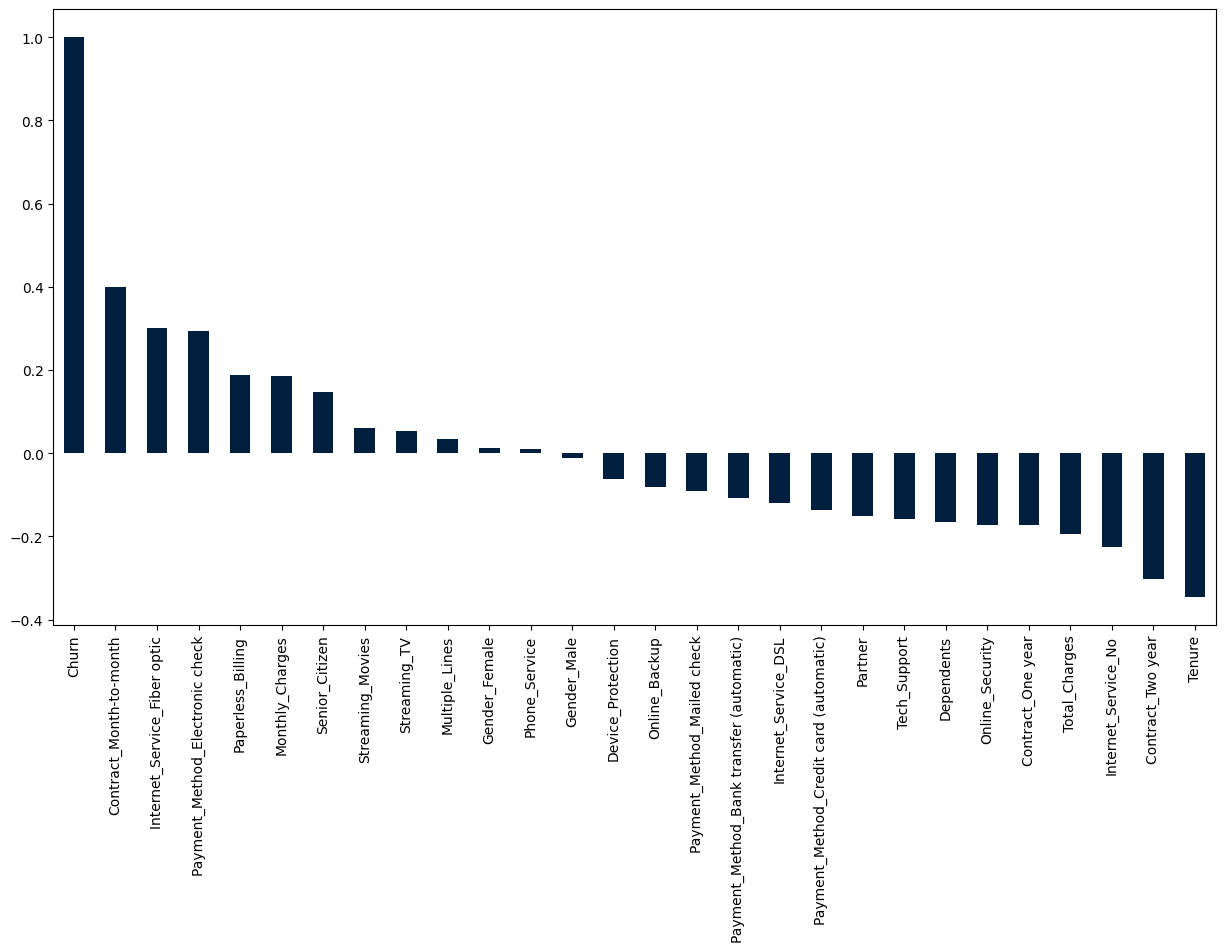

In [ ]:
plt.figure(figsize=(15,8))
td2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color='#001F3F')


## Senior citizens vs churn

<ipython-input-484-d5e5e46dc102>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=tsc, x='Churn', palette=custom_palette)


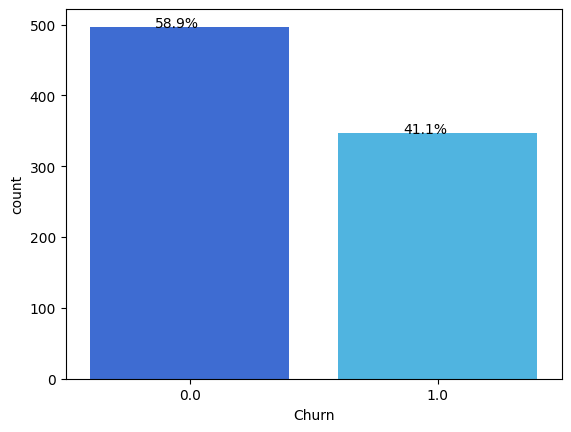

In [ ]:
tsc = td1[td1['Senior_Citizen'] == 1]
ax = sns.countplot(data=tsc, x='Churn', palette=custom_palette)
total = len(tsc)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')


## Dependent vs churn

<Axes: xlabel='Dependents', ylabel='count'>

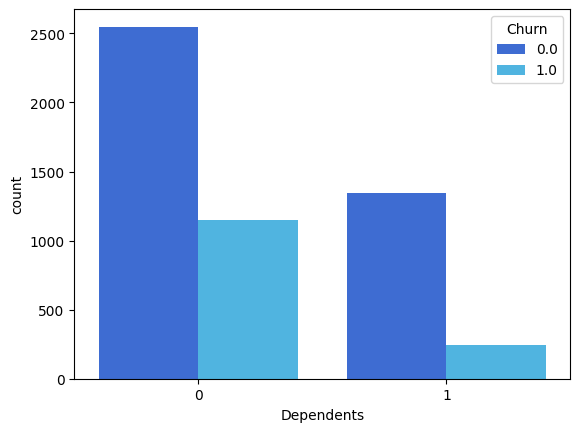

In [ ]:
sns.countplot(x='Dependents', hue='Churn', data=td1, palette=custom_palette)

## Partner vs Churn

<Axes: xlabel='Partner', ylabel='count'>

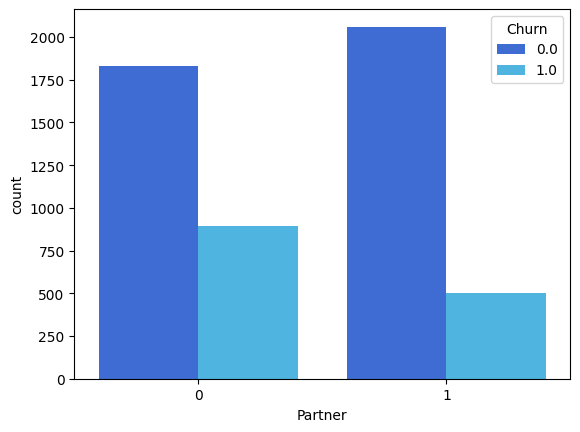

In [ ]:
sns.countplot(x='Partner', hue='Churn', data=td1, palette=custom_palette)

#Churn vs Payment Method

<Axes: xlabel='Payment_Method', ylabel='count'>

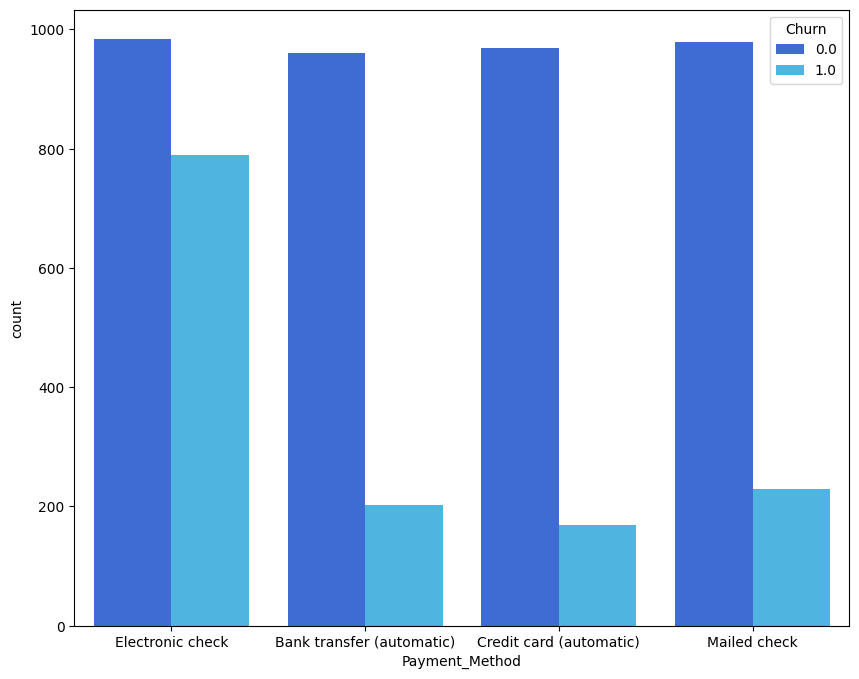

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Payment_Method',hue='Churn',data=td1,palette=custom_palette)

## Contract vs Churn

<Axes: xlabel='Contract', ylabel='count'>

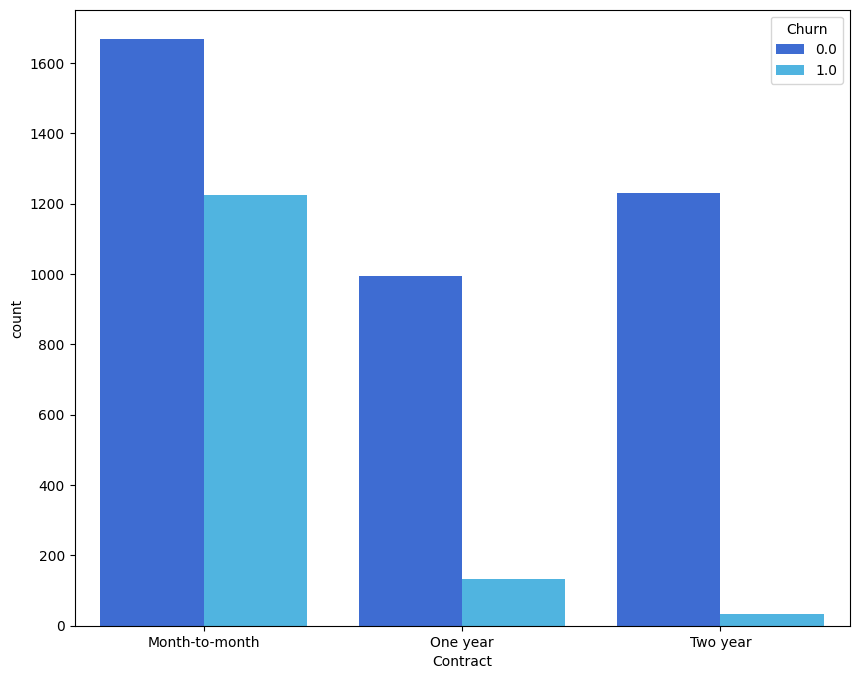

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract',hue='Churn',data=td1,palette=custom_palette)

## TENURE VS CHURN

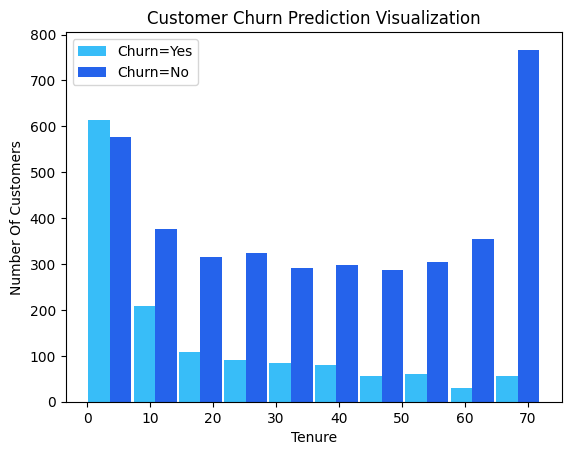

In [ ]:
custom_palette = sns.color_palette(["#38bdf8", "#2563eb"])

tenure_churn_no = td1[td1.Churn == 0].Tenure
tenure_churn_yes = td1[td1.Churn == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=custom_palette, label=['Churn=Yes', 'Churn=No'])
plt.legend()

# Show the plot
plt.show()


Monthly and total charges vs churn

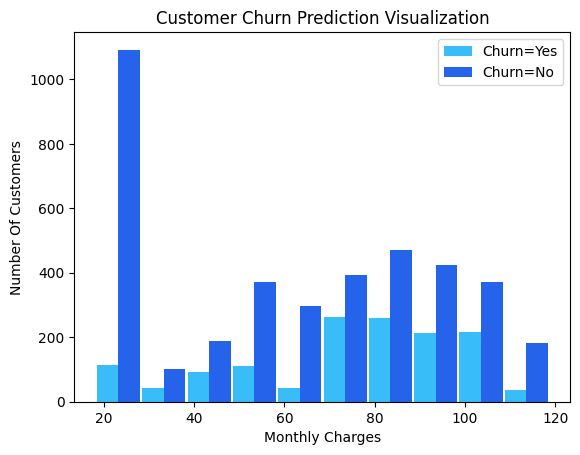

In [ ]:
mc_churn_no = td1[td1.Churn==0].Monthly_Charges
mc_churn_yes = td1[td1.Churn==1].Monthly_Charges
custom_palette = sns.color_palette(["#38bdf8", "#2563eb"])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=custom_palette, label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()


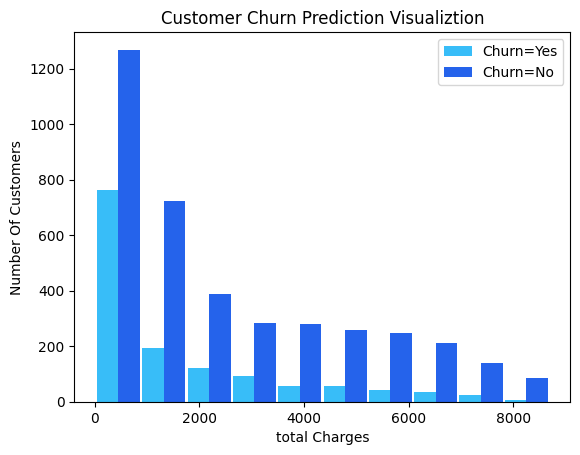

In [ ]:
nc_churn_no = td1[td1.Churn==0].Total_Charges
nc_churn_yes = td1[td1.Churn==1].Total_Charges
custom_palette = sns.color_palette(["#38bdf8", "#2563eb"])
plt.xlabel("total Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([nc_churn_yes, nc_churn_no], rwidth=0.95, color=custom_palette,label=['Churn=Yes','Churn=No'])
plt.legend()

<ipython-input-492-3c243a35a8e9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(td1.Total_Charges[(td1["Churn"] == 0) ],
<ipython-input-492-3c243a35a8e9>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(td1.Total_Charges[(td1["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

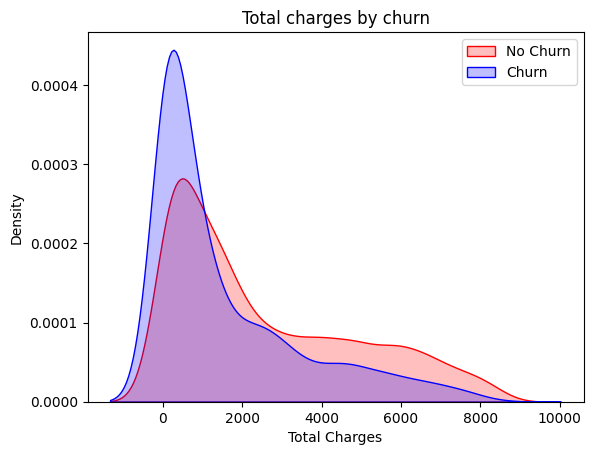

In [ ]:
Tot = sns.kdeplot(td1.Total_Charges[(td1["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(td1.Total_Charges[(td1["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<ipython-input-493-ff750969bf65>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(td1.Monthly_Charges[(td1["Churn"] == 0) ],
<ipython-input-493-ff750969bf65>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(td1.Monthly_Charges[(td1["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

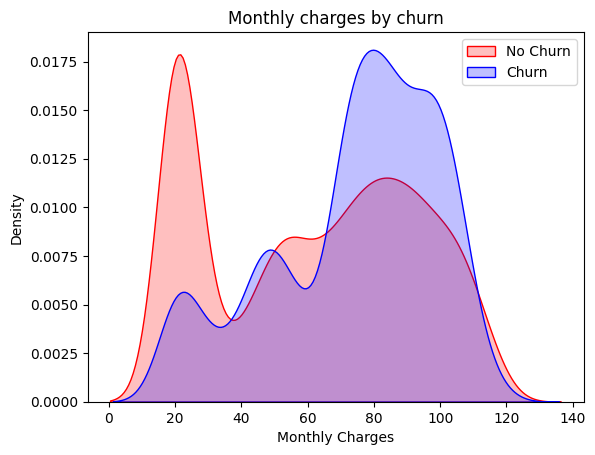

In [ ]:
Mth = sns.kdeplot(td1.Monthly_Charges[(td1["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(td1.Monthly_Charges[(td1["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

# Corelation of Monthly charges,Total charges ,Contract type and  tenure .

<Axes: xlabel='Monthly_Charges', ylabel='Total_Charges'>

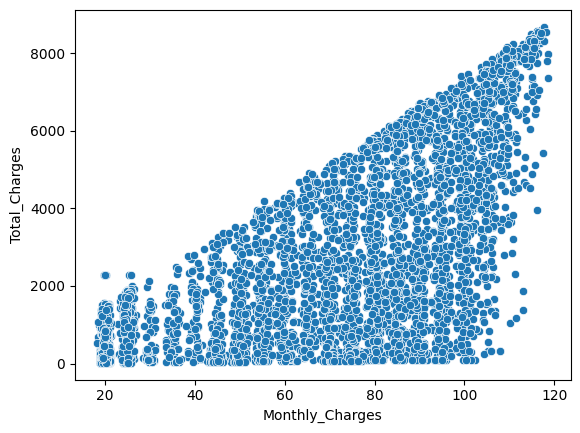

In [ ]:
sns.scatterplot(x='Monthly_Charges',y='Total_Charges',data=td1)

<Axes: xlabel='Monthly_Charges', ylabel='Tenure'>

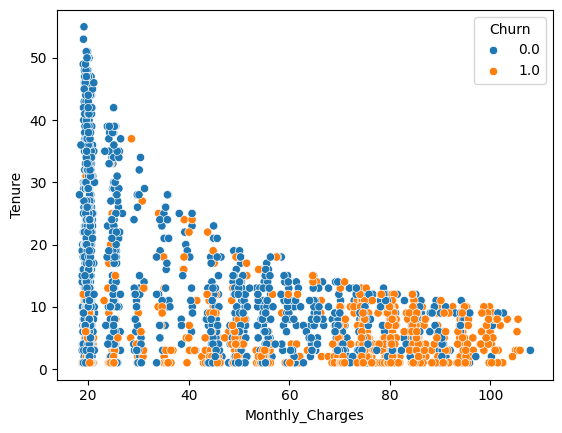

In [ ]:
td_lowtc=td1[td1.Total_Charges<1000]
sns.scatterplot(x=td_lowtc.Monthly_Charges,y=td_lowtc.Tenure,hue='Churn',data=td_lowtc)

Customers having lower total charges have a higher chance of churning compared to lower monthly charges that is because majority of the customers are churning have a small tenure and higher monthly charge .

<ipython-input-496-17bf6be447a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(td1[td1['Contract']=='Month-to-month']['Tenure'],
<ipython-input-496-17bf6be447a3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(td1[td1['Contract']=='One year']['Tenure'],
<ipython-input-496-17bf6be4

Text(0.5, 1.0, 'Two Year Contract')

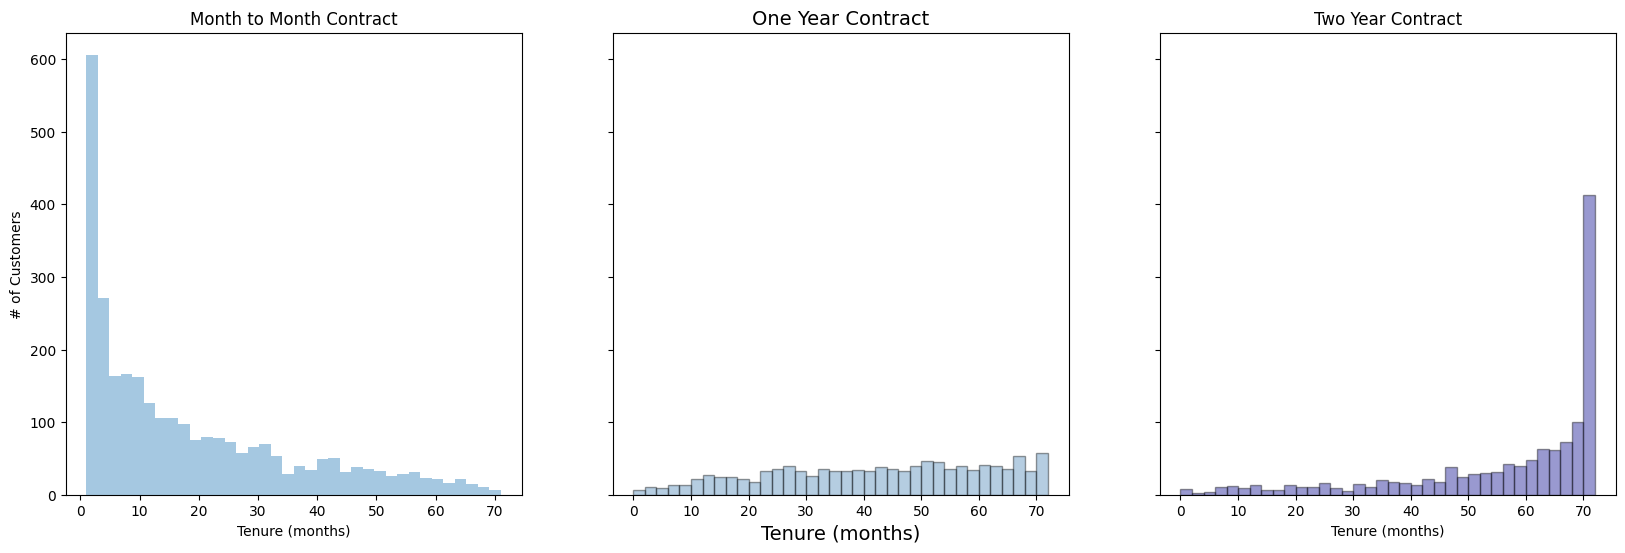

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(td1[td1['Contract']=='Month-to-month']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(td1[td1['Contract']=='One year']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(td1[td1['Contract']=='Two year']['Tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

<Axes: xlabel='Tenure', ylabel='Monthly_Charges'>

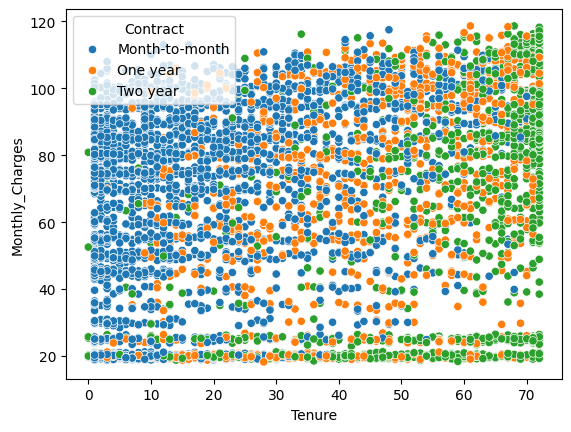

In [ ]:
sns.scatterplot(y=td1.Monthly_Charges,x=td1.Tenure,hue='Contract',data=td1)

Customers are no longer joining the two year plan and also joining the month to month contract , half of the customers are churning .

# Senior citizens analysis

## senior citizens with 2 year contract

<ipython-input-498-970501f79644>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Senior_Citizen', data=ty, palette=custom_palette)


Text(0.5, 1.0, 'Count of Senior Citizens with Two-Year Contract')

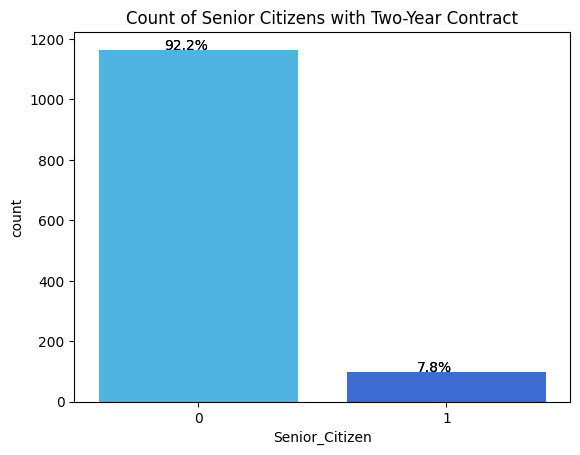

In [ ]:
ty = td1[td1['Contract'] == 'Two year']
sns.countplot(x='Senior_Citizen', data=ty)
ax = sns.countplot(x='Senior_Citizen', data=ty, palette=custom_palette)
total = len(ty)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')
ax.set_title('Count of Senior Citizens with Two-Year Contract')


Senior citizens are not preferring to take the 2 year plan and relying on short term month to month contract .

<Axes: xlabel='Internet_Service', ylabel='count'>

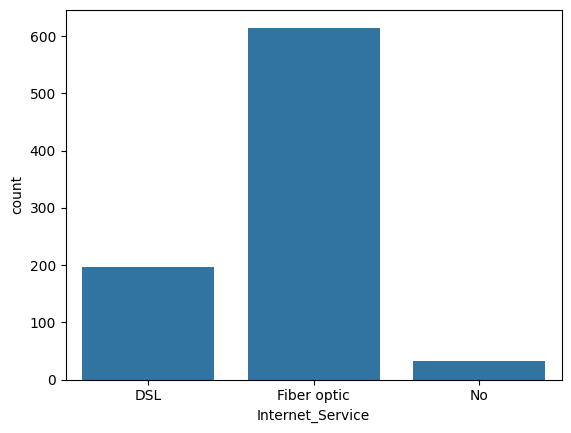

In [ ]:
tm=td1[td1.Senior_Citizen==1]
sns.countplot(x='Internet_Service',data=tm)

Senior citizens are preferring to take internet service over the normal people .


# Internet Services

<Axes: xlabel='Internet_Service', ylabel='count'>

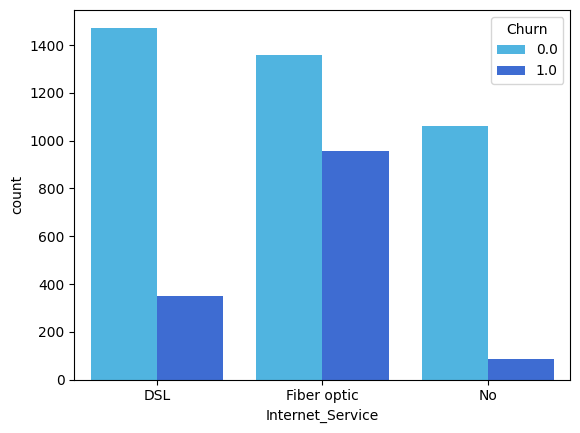

In [ ]:
sns.countplot(x='Internet_Service',hue='Churn',data=td1,palette=custom_palette)


Fiber optics have the highest churn compared to asl, and no internet service .While people opting no internet services are the least likely to churn.

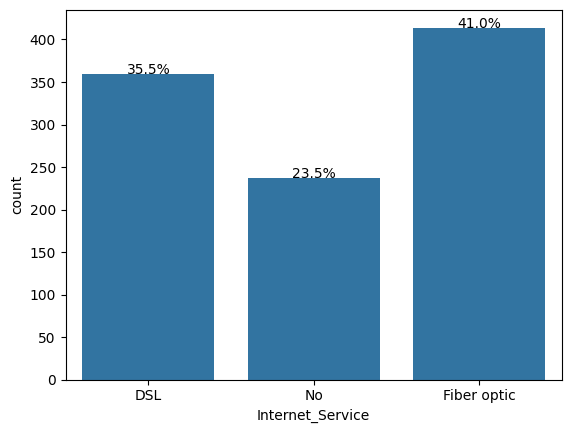

In [ ]:
tnc = td1[td1['Tenure'] < 6]
ax = sns.countplot(x='Internet_Service', data=tnc )
total = len(tnc)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

<Axes: xlabel='Internet_Service', ylabel='Monthly_Charges'>

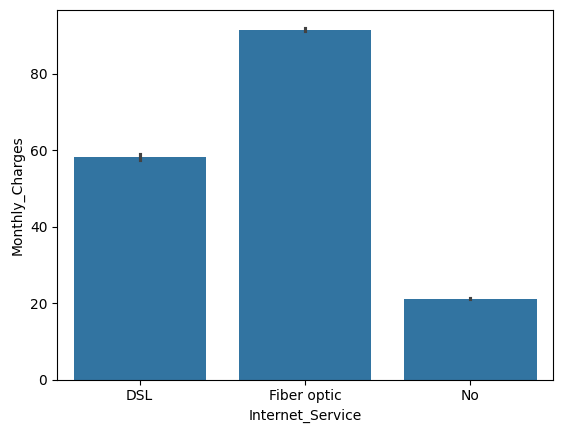

In [ ]:
sns.barplot(x='Internet_Service',y='Monthly_Charges',data=td1)

The fiber optic service have the highest monthly charges compared to other ,also motivating people to churn.

### Streaming movies and streaming tv

<ipython-input-503-6d657ba5f033>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Streaming_Movies',data=td1,palette=custom_palette)


<Axes: xlabel='Streaming_Movies', ylabel='count'>

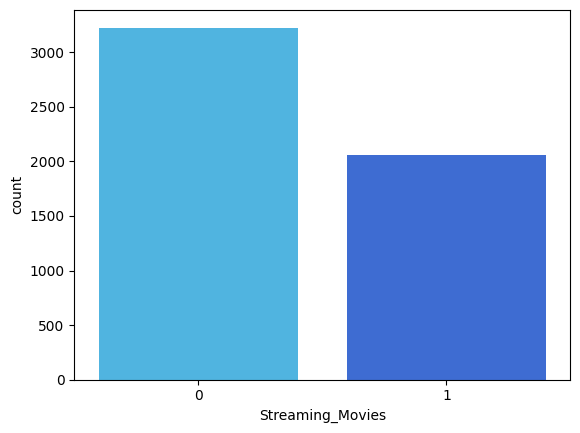

In [ ]:
sns.countplot(x='Streaming_Movies',data=td1,palette=custom_palette)

<ipython-input-504-ef0cf463b825>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Streaming_TV',data=td1,palette=custom_palette)


<Axes: xlabel='Streaming_TV', ylabel='count'>

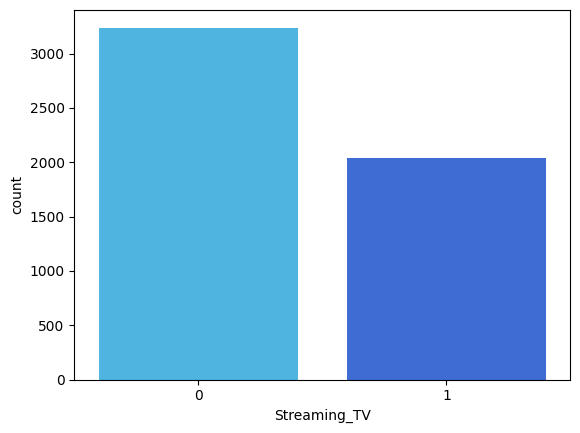

In [ ]:
sns.countplot(x='Streaming_TV',data=td1,palette=custom_palette)

Streaming tv and streaming movie services have the highest churn beacuse of either the inefficiency of the service or the high cost.

In [ ]:
td3 = td1[(td1['Online_Security'] != "No internet service") &
       (td1['Online_Backup'] != "No internet service") &
       (td1['Device_Protection'] != "No internet service") &
       (td1['Tech_Support'] != "No internet service") &
       (td1['Streaming_TV'] != "No internet service") &
       (td1['Streaming_Movies'] != "No internet service")]
td3

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Male,0,0,1,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,25.30,25.30,1.0
1,Female,0,0,0,7,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,75.15,525.00,0.0
2,Female,0,0,1,4,1,0,No,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),20.05,85.50,0.0
3,Female,0,0,0,29,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),76.00,2215.25,0.0
4,Female,0,0,0,3,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),75.10,270.70,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,0,1,0,1,1,0,Fiber optic,1,0,0,0,1,1,Month-to-month,1,Electronic check,95.00,95.00,1.0
5278,Female,0,1,1,23,1,1,DSL,1,1,1,1,1,1,Two year,1,Credit card (automatic),91.10,2198.30,0.0
5279,Male,0,1,1,12,1,0,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,21.15,306.05,0.0
5280,Male,1,0,0,12,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.45,1200.15,1.0


<ipython-input-506-9f9d8c11e6e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=tnc, palette=blue_black_palette)


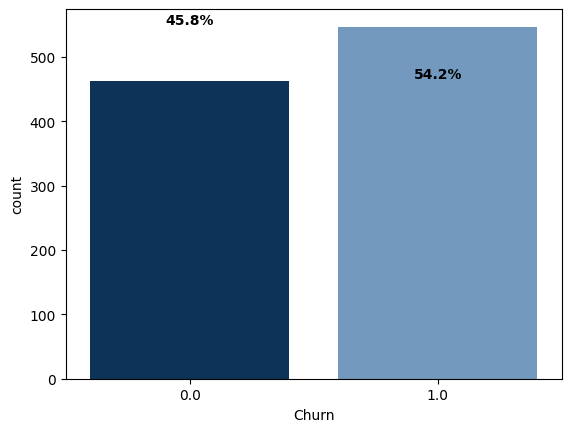

In [ ]:
blue_black_palette = sns.color_palette(['#003366', '#6699CC'])
tnc = td1[td1['Tenure'] < 6]
churn_counts = tnc['Churn'].value_counts()
total = len(tnc)
percentage = (churn_counts / total) * 100
ax = sns.countplot(x='Churn', data=tnc, palette=blue_black_palette)
for i, count in enumerate(churn_counts):
    percentage_text = f'{percentage[i]:.1f}%'
    ax.text(i, count, percentage_text, ha='center', va='bottom', fontweight='bold', color='black')

New Customers that are their for less than 6 months have almost 50% chance of churning , thus the inflow of new customers is not good .

# Analysing payment methods

<Axes: xlabel='Payment_Method', ylabel='count'>

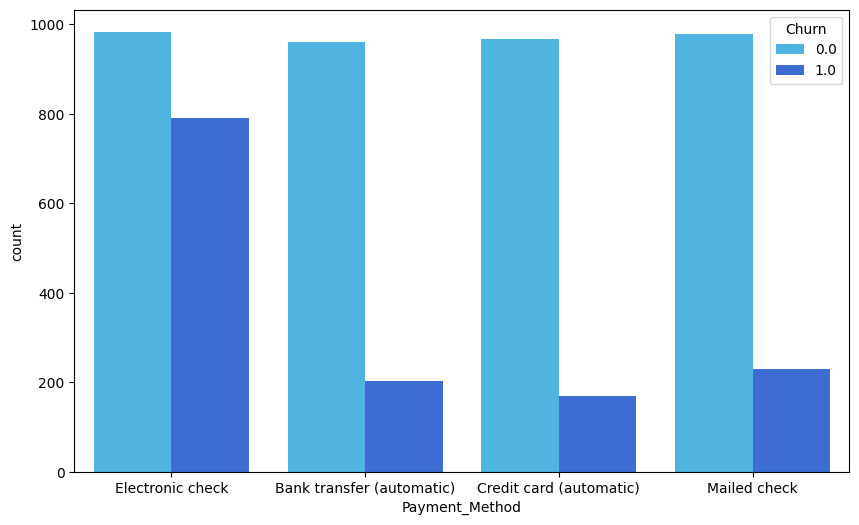

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment_Method',hue="Churn",data=td1,palette=custom_palette)

### The electronic check payment method has the highest number of people who are churning. Thus, the electronic payment gateway has probably some probele  which need to be improved .